In [1]:
# Dependencies
import requests
import json
#from config import api_key, app_id
import pandas as pd

from pprint import pprint
import matplotlib.pyplot as plt

In [2]:
#get the api url
base_url = "https://api.tfl.gov.uk/AccidentStats/2019/"

In [3]:
# store url in response
response=requests.get(base_url)

In [4]:
#complete_url = f"{base_url}?app_id={app_id}&app_key={app_key}"
data=response.json()
#pprint(data)

In [5]:
# convert it into dataframe
acc_dataframe=pd.DataFrame(data)
acc_dataframe.head()

,$type,id,lat,lon,location,date,severity,borough,casualties,vehicles
0,Tfl.Api.Presentation.Entities.AccidentStats.Ac...,345906,51.511963,-0.028211,On Commercial Road Near The Junction With Burd...,2019-01-03T01:20:00Z,Slight,Tower Hamlets,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...
1,Tfl.Api.Presentation.Entities.AccidentStats.Ac...,345907,51.371636,-0.117621,On Purley Way 20 metres north of The Junction ...,2019-01-02T22:45:00Z,Slight,Croydon,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...
2,Tfl.Api.Presentation.Entities.AccidentStats.Ac...,345908,51.514951,-0.072747,On Whitechapel High Street Near The Junction W...,2019-01-02T18:45:00Z,Slight,Tower Hamlets,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...
3,Tfl.Api.Presentation.Entities.AccidentStats.Ac...,345909,51.519173,-0.262356,On western Avenue 10 metres south of The Junct...,2019-01-03T08:41:00Z,Slight,Ealing,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...
4,Tfl.Api.Presentation.Entities.AccidentStats.Ac...,345910,51.565743,-0.136308,On Macdonald Road 30 metres south of The Junct...,2019-01-03T08:37:00Z,Slight,Islington,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...


In [6]:
#check the column names
acc_dataframe.columns

Index(['$type', 'id', 'lat', 'lon', 'location', 'date', 'severity', 'borough',
       'casualties', 'vehicles'],
      dtype='object')

In [7]:
#total count of values
acc_dataframe.count()

$type         50626
id            50626
lat           50626
lon           50626
location      50626
date          50626
severity      50626
borough       50626
casualties    50626
vehicles      50626
dtype: int64

In [8]:
acc_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50626 entries, 0 to 50625
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   $type       50626 non-null  object 
 1   id          50626 non-null  int64  
 2   lat         50626 non-null  float64
 3   lon         50626 non-null  float64
 4   location    50626 non-null  object 
 5   date        50626 non-null  object 
 6   severity    50626 non-null  object 
 7   borough     50626 non-null  object 
 8   casualties  50626 non-null  object 
 9   vehicles    50626 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 3.9+ MB


In [9]:
acc_dataframe["borough"].unique()

array(['Tower Hamlets', 'Croydon', 'Ealing', 'Islington',
       'Barking and Dagenham', 'Wandsworth', 'Hounslow',
       'Richmond upon Thames', 'City of Westminster',
       'Kensington and Chelsea', 'Newham', 'Bexley', 'Southwark',
       'Lewisham', 'Havering', 'Merton', 'Bromley', 'Kingston',
       'Redbridge', 'Brent', 'Lambeth', 'Hillingdon', 'Enfield',
       'Waltham Forest', 'Barnet', 'Camden', 'Harrow', 'Hackney',
       'Sutton', 'Hammersmith and Fulham', 'Haringey', 'Greenwich',
       'City of London'], dtype=object)

In [10]:
count=acc_dataframe["severity"].value_counts()
count

Slight     43060
Serious     7326
Fatal        240
Name: severity, dtype: int64

In [11]:
count_borough_2019=acc_dataframe["borough"].value_counts()
count_borough_2019

City of Westminster       3032
Lambeth                   2382
Tower Hamlets             2232
Southwark                 2186
Ealing                    1966
Croydon                   1908
Barnet                    1896
Enfield                   1894
Wandsworth                1890
Camden                    1838
Newham                    1758
Hackney                   1730
Brent                     1722
Haringey                  1698
Lewisham                  1590
Hounslow                  1508
Islington                 1468
Greenwich                 1448
Bromley                   1418
Kensington and Chelsea    1410
Hammersmith and Fulham    1404
Redbridge                 1398
Hillingdon                1364
Waltham Forest            1318
Barking and Dagenham      1212
Havering                  1164
Merton                     954
Bexley                     950
Sutton                     884
Harrow                     854
Richmond upon Thames       838
Kingston                   674
City of 

In [12]:
copy_2019_df=acc_dataframe.copy()
copy_2019_df.head()

,$type,id,lat,lon,location,date,severity,borough,casualties,vehicles
0,Tfl.Api.Presentation.Entities.AccidentStats.Ac...,345906,51.511963,-0.028211,On Commercial Road Near The Junction With Burd...,2019-01-03T01:20:00Z,Slight,Tower Hamlets,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...
1,Tfl.Api.Presentation.Entities.AccidentStats.Ac...,345907,51.371636,-0.117621,On Purley Way 20 metres north of The Junction ...,2019-01-02T22:45:00Z,Slight,Croydon,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...
2,Tfl.Api.Presentation.Entities.AccidentStats.Ac...,345908,51.514951,-0.072747,On Whitechapel High Street Near The Junction W...,2019-01-02T18:45:00Z,Slight,Tower Hamlets,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...
3,Tfl.Api.Presentation.Entities.AccidentStats.Ac...,345909,51.519173,-0.262356,On western Avenue 10 metres south of The Junct...,2019-01-03T08:41:00Z,Slight,Ealing,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...
4,Tfl.Api.Presentation.Entities.AccidentStats.Ac...,345910,51.565743,-0.136308,On Macdonald Road 30 metres south of The Junct...,2019-01-03T08:37:00Z,Slight,Islington,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...


In [13]:
# Extract the value of mode from casualties using lambda function
copy_2019_df['mode'] = copy_2019_df['casualties'].apply(lambda x: x[0]['mode'] if x and len(x) > 0 and 'mode' in x[0] else None)

copy_2019_df.head()

,$type,id,lat,lon,location,date,severity,borough,casualties,vehicles,mode
0,Tfl.Api.Presentation.Entities.AccidentStats.Ac...,345906,51.511963,-0.028211,On Commercial Road Near The Junction With Burd...,2019-01-03T01:20:00Z,Slight,Tower Hamlets,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,Car
1,Tfl.Api.Presentation.Entities.AccidentStats.Ac...,345907,51.371636,-0.117621,On Purley Way 20 metres north of The Junction ...,2019-01-02T22:45:00Z,Slight,Croydon,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,Car
2,Tfl.Api.Presentation.Entities.AccidentStats.Ac...,345908,51.514951,-0.072747,On Whitechapel High Street Near The Junction W...,2019-01-02T18:45:00Z,Slight,Tower Hamlets,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,PedalCycle
3,Tfl.Api.Presentation.Entities.AccidentStats.Ac...,345909,51.519173,-0.262356,On western Avenue 10 metres south of The Junct...,2019-01-03T08:41:00Z,Slight,Ealing,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,Pedestrian
4,Tfl.Api.Presentation.Entities.AccidentStats.Ac...,345910,51.565743,-0.136308,On Macdonald Road 30 metres south of The Junct...,2019-01-03T08:37:00Z,Slight,Islington,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,PoweredTwoWheeler


In [14]:
#delete unwanted columns to reduce the size of data
unwanted_columns=['$type','id','vehicles','casualties']
acc_df_cleaned=copy_2019_df.drop(unwanted_columns, axis=1)
acc_df_cleaned.head(10)

,lat,lon,location,date,severity,borough,mode
0,51.511963,-0.028211,On Commercial Road Near The Junction With Burd...,2019-01-03T01:20:00Z,Slight,Tower Hamlets,Car
1,51.371636,-0.117621,On Purley Way 20 metres north of The Junction ...,2019-01-02T22:45:00Z,Slight,Croydon,Car
2,51.514951,-0.072747,On Whitechapel High Street Near The Junction W...,2019-01-02T18:45:00Z,Slight,Tower Hamlets,PedalCycle
3,51.519173,-0.262356,On western Avenue 10 metres south of The Junct...,2019-01-03T08:41:00Z,Slight,Ealing,Pedestrian
4,51.565743,-0.136308,On Macdonald Road 30 metres south of The Junct...,2019-01-03T08:37:00Z,Slight,Islington,PoweredTwoWheeler
5,51.551805,0.130436,On Valence Avenue Near The Junction With Wood ...,2019-01-02T18:10:00Z,Slight,Barking and Dagenham,Car
6,51.391461,-0.112869,London Road,2019-01-03T09:50:00Z,Slight,Croydon,PoweredTwoWheeler
7,51.427047,-0.166814,On Mitcham Road Near The Junction With Tooting...,2019-01-02T17:20:00Z,Slight,Wandsworth,Pedestrian
8,51.475380,-0.395505,On Great west Road Near The Junction With Grea...,2019-01-03T06:45:00Z,Serious,Hounslow,PedalCycle
9,51.465106,-0.248171,On Upper Richmond Road Near The Junction With ...,2019-01-03T12:30:00Z,Slight,Richmond upon Thames,PedalCycle


In [15]:
# Check if there are any None values in the 'mode' column
are_none_values = acc_df_cleaned['mode'].isna().any()
# Print the result
print(f"Are there any None values in the 'mode' column? {are_none_values}")


Are there any None values in the 'mode' column? False


In [16]:
# Transfer data to json
#acc_df_cleaned.to_json("accidents_data.json") This format do not output response as records
# Convert DataFrame to a list of dictionaries
data_list = acc_df_cleaned.to_dict(orient="records")

# Write the list of dictionaries to a JSON file with commas at the end of each line
with open("./Resources/accidents_data.json", "w") as json_file:
    json_file.write("[\n")
    for i, record in enumerate(data_list):
        json.dump(record, json_file)
        if i < len(data_list) - 1:
            json_file.write(",\n")
    json_file.write("\n]")

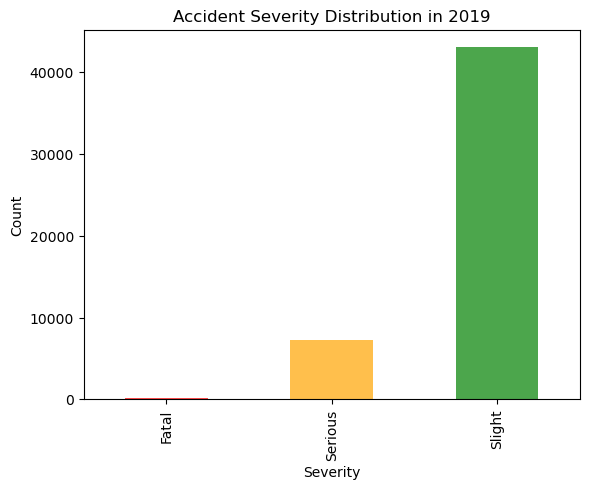

In [17]:

# this is just for eda purpose only not used in final data
# Group by severity for 2019
severity_group_2019 = acc_dataframe.groupby('severity').size()

# Plot the bar chart
severity_chart_2019 = severity_group_2019.plot(kind="bar", color=['red', 'orange', 'green'], alpha=0.7)


# Set chart properties
severity_chart_2019.set_title("Accident Severity Distribution in 2019")
severity_chart_2019.set_xlabel("Severity")
severity_chart_2019.set_ylabel("Count")

# Show the plot
plt.show()